In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [65]:
data, label = datasets.make_classification(n_samples = 1000, n_classes = 2, n_clusters_per_class = 1, n_features=2, 
                                           n_informative = 2, n_redundant = 0, random_state = 3)

In [66]:
# datasets.make_classification?

In [67]:
print(data.shape)

(1000, 2)


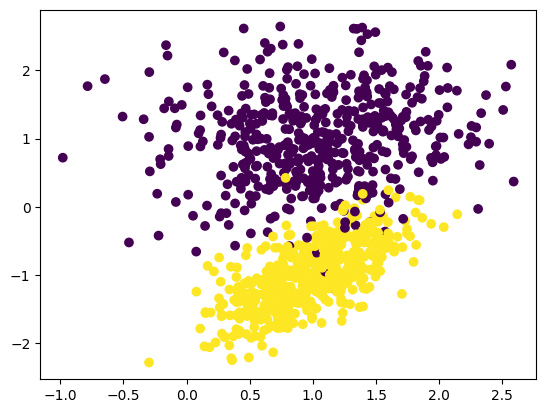

In [68]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [69]:
print(np.unique(label))

[0 1]


In [70]:
label[label == 0] = -1

In [71]:
print(np.unique(label))

[-1  1]


In [98]:
class SVM:
    
    def __init__(self, c = 0.01):
        self.C = c
        self.W = 0
        self.B = 0
        
    def hingeloss(self, W, B, X, Y):
        
        loss = 0.5 * (np.dot(W, W.T))
        
        for i in range(X.shape[0]):
            ji = Y[i] * (np.dot(W, X[i]) + B)
            loss += self.C * max(0, 1 - ji)
        
        return loss[0][0]
    
    def gradient_descent(self, X, Y, epochs = 100, batch_size = 200, lr_rate = 0.003):
        
        W = np.zeros((1, X.shape[1]))
        B = 0
        loss = []
        
        for epoch in range(epochs):
            ids = np.arange(X.shape[0])
            np.random.shuffle(ids)
            loss.append(self.hingeloss(W, B, X, Y))
            
            for batch_start in range(int(X.shape[0]/batch_size)):
                grad_w = 0
                grad_b = 0
                
                for i in range(batch_size * batch_start,batch_size * (batch_start + 1)):
                    j = ids[i]
                    
                    ji = Y[j] * (np.dot(W, X[j]) + B)
                    if ji>=1:
                        grad_w += 0
                        grad_b += 0
                    else:
                        grad_w += self.C * Y[j] * X[j]
                        grad_b += self.C * Y[j]
                
                W = W - lr_rate * W + lr_rate * grad_w
                B = B + lr_rate * grad_b
        
        self.W = W
        self.B = B
        return W, B, loss

In [153]:
svm = SVM(0.1)
W, B, loss = svm.gradient_descent(data, label)

In [154]:
loss

[99.9999999999986,
 70.20859042254115,
 44.22372748225935,
 31.581486273225785,
 26.815264251409847,
 24.246914895674767,
 22.639308940981685,
 21.52756630334071,
 20.677535473704946,
 20.00433423148433,
 19.478436598269464,
 19.066487374948377,
 18.709548430508132,
 18.405090389515074,
 18.13372400009051,
 17.894855126487208,
 17.680360696640903,
 17.482831464898734,
 17.304013825263205,
 17.13967577533231,
 16.987814840977684,
 16.851653688154716,
 16.732159649027345,
 16.618979262771003,
 16.514507268081445,
 16.419435868376592,
 16.330938693534957,
 16.250359378580534,
 16.17844257240123,
 16.112011172199956,
 16.04945349697496,
 15.995367341017463,
 15.948737006265457,
 15.906423412724386,
 15.866661492830225,
 15.829987190441372,
 15.796404478429142,
 15.761977661492164,
 15.729882504540749,
 15.699646389853743,
 15.668306896054895,
 15.636748560375407,
 15.608925133570668,
 15.58208693722661,
 15.55747950434696,
 15.534166822241168,
 15.513853325453862,
 15.491335793607293,
 15.

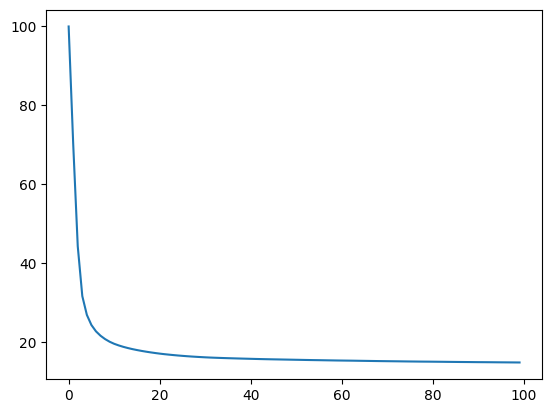

In [155]:
plt.plot(loss)

In [156]:
W, B

(array([[ 0.33864455, -1.55456088]]), -0.45149999999999996)

In [157]:
def visualize(w1, w2, b):
    X = np.arange(-1, 5)
    dec_boun = -(w1 * X + b)/w2
    
    supp_vec_1 = -(w1 * X + b + 1)/w2
    supp_vec_2 = -(w1 * X + b - 1)/w2
    
    plt.plot(X, dec_boun, color = 'red', label = 'Decision Boundary')
    plt.plot(X, supp_vec_1, color = 'green', label = 'Support Vector')
    plt.plot(X, supp_vec_2, color = 'blue', label = 'Support Vector')
    plt.scatter(data[:, 0], data[:, 1], c = label)
    plt.legend(title = 'Lines')

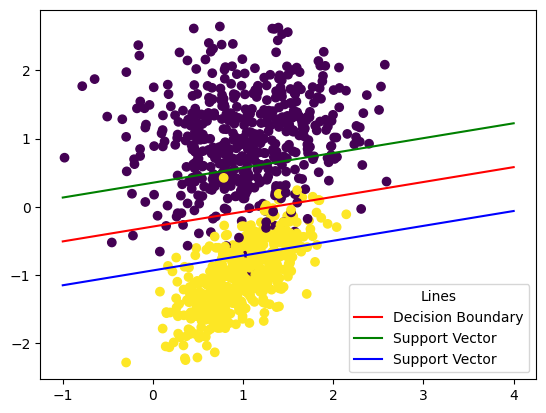

In [158]:
visualize(W[0][0], W[0][1], B)